Exploring the effect of L2 regularization

In [79]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

digits = datasets.load_digits()

In [80]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
        x: data to base x-axis meshgrid on
        y: data to base y-axis meshgrid on
        h: stepsize for meshgrid, optional

    Returns
    -------
        xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
        ax: matplotlib axes object
        clf: a classifier
        xx: meshgrid ndarray
        yy: meshgrid ndarray
        params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)),
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None):
    # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
        #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors=\'k\', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
                   s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,
                   s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #     ax.set_xlabel(data.feature_names[0])
    #     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        #     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

<>:63: SyntaxWarning: invalid escape sequence '\D'
<>:63: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-3513585600.py:63: SyntaxWarning: invalid escape sequence '\D'
  cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)


In [81]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Split data into 50% train and 50% test subsets
X_train, X_valid, y_train, y_valid = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

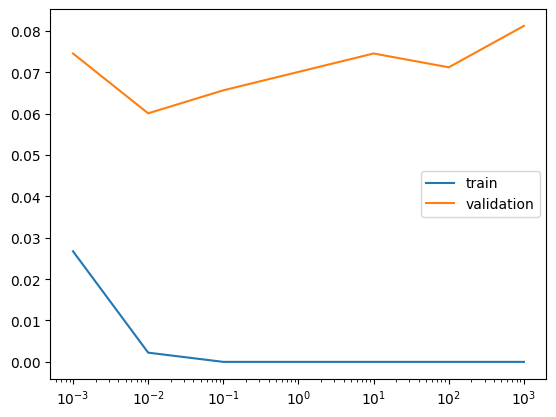

In [82]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Define the list of C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train,y_train)

    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )

# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

We can see, too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.

We'll perform feature selection on the movie review sentiment data set using L1 regularization

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np

# Load the datasets
train = pd.read_csv('/train.csv', on_bad_lines='skip', engine='python')
test = pd.read_csv('/content/test.csv', on_bad_lines='skip', engine='python')

In [84]:
# Separate features (X) and target (y)
X_train_text = train['text'].fillna('') # Fill NaN with empty string
y_train = train['sentiment']
X_test_text = test['text'].fillna('') # Fill NaN with empty string

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000) # You can adjust max_features

# Fit the vectorizer on the training text data and transform it
X_train = vectorizer.fit_transform(X_train_text)

# Transform the test text data
X_test = vectorizer.transform(X_test_text)

X= vectorizer.fit_transform(train['text'].fillna(''))
y = train['sentiment']

In [85]:
# Specify L1 regularization
lr = LogisticRegression(solver='liblinear', penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X, y)


# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 1}
Total number of features: 5000
Number of selected features: 1120


We can see, a whole lot of features were discarded here

We'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dataset.

In [86]:
vocab = vectorizer.get_feature_names_out()
vocab

array(['00', '000', '10', ..., 'zombie', 'zombies', 'zone'], dtype=object)

In [87]:
# Get the indices of the sorted coefficients
inds_ascending = np.argsort(best_lr.coef_.flatten())
inds_descending = inds_ascending[::-1]

# Print the most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most postive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

Most negative words: worst, waste, awful, poorly, boring, 

Most positive words: excellent, perfect, great, wonderfully, refreshing, 



 We will observe the effects of changing the regularization strength on the predicted probabilities.

In [88]:
X = np.array([[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]])
y = np.array([-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1])

/tmp/ipython-input-3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipython-input-3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


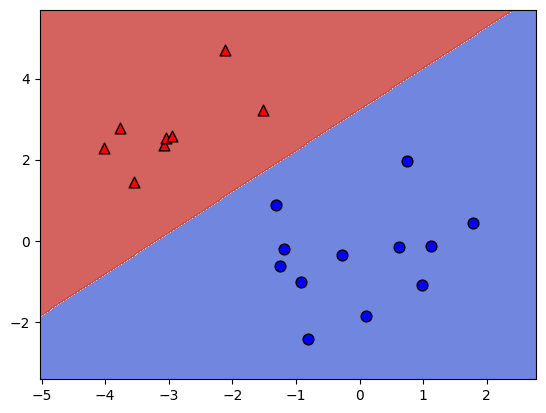

Maximum predicted probability for C = 1.0 0.9973152198521483


/tmp/ipython-input-3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipython-input-3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


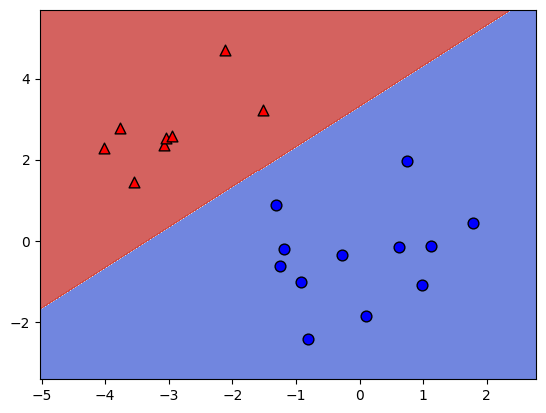

Maximum predicted probability for C = 0.1 0.9351932153846491


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Set the regularization strength
model1 = LogisticRegression(C=1)

# Fit and plot
model1.fit(X,y)
# Call plot_classifier with proba=False to get two colors
plot_classifier(X,y,model1,proba=False)

# Predict probabilities on training points
prob1 = model1.predict_proba(X)
print("Maximum predicted probability for C = 1.0", np.max(prob1))

# Set the regularization strength
model2 = LogisticRegression(C=0.1)

# Fit and plot
model2.fit(X,y)
# Call plot_classifier with proba=False to get two colors
plot_classifier(X,y,model2,proba=False)

# Predict probabilities on training points
prob = model2.predict_proba(X)
print("Maximum predicted probability for C = 0.1", np.max(prob))

Smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function.

We will visualize the examples that the logistic regression model is most and least confident about by looking at the largest and smallest predicted probabilities.

In [91]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X = data
y= digits.target

In [92]:
def show_digit(idx, model):
    fig = plt.figure(figsize=(10, 5))

    # Display the digit image
    plt.subplot(1, 2, 1)
    plt.imshow(digits.images[idx], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'True Label: {digits.target[idx]}')
    plt.axis('off')

    # Display the predicted probabilities as a bar chart
    plt.subplot(1, 2, 2)
    probabilities = model.predict_proba(X[idx].reshape(1, -1))[0]
    predicted_class = model.predict(X[idx].reshape(1, -1))[0]
    bars = plt.bar(range(len(probabilities)), probabilities)
    bars[predicted_class].set_color('red') # Highlight the predicted class
    plt.xticks(range(len(probabilities)))
    plt.ylim([0, 1])
    plt.title(f'Predicted: {predicted_class} (Confidence: {probabilities[predicted_class]:.2f})')
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


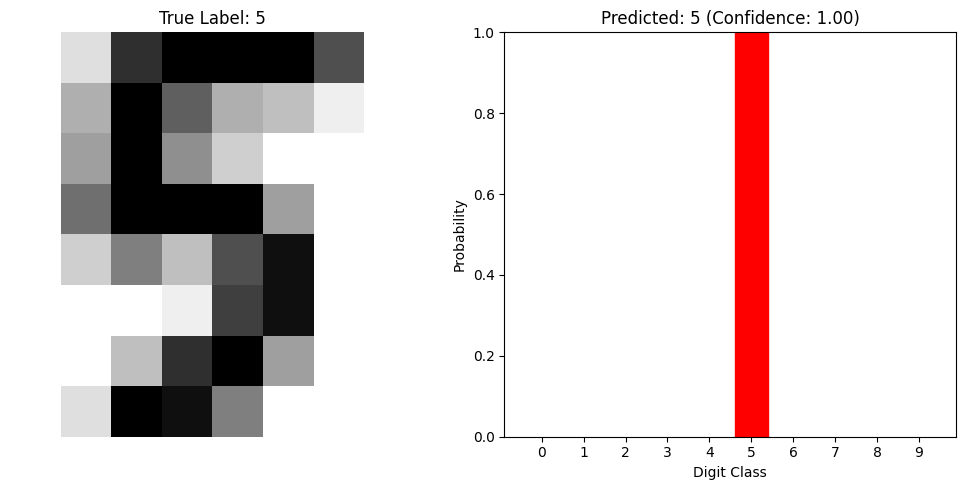

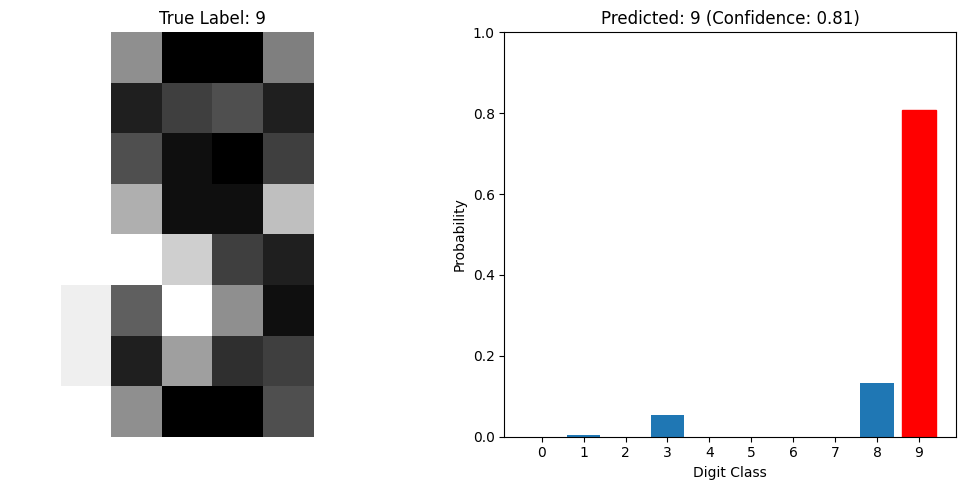

In [93]:
lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

As we can see, the least confident example looks like a weird 9, and the most confident example looks like a very typical 5.

We will fit the two types of multi-class logistic regression, one-vs-rest and softmax/multinomial, on the handwritten digits data set and compare the results.

In [94]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


In [95]:
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(multi_class='ovr')
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always

OVR training accuracy: 1.0
OVR test accuracy    : 0.9187986651835373
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9299221357063404


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracies of the two methods are fairly similar on this data set.

We'll continue with the two types of multi-class logistic regression, but on a toy 2D data set specifically designed to break the one-vs-rest scheme

In [96]:
X_train = pd.read_csv('/toy_X_train.csv').to_numpy()
y_train = pd.read_csv('/toy_y_train.csv').to_numpy().ravel()

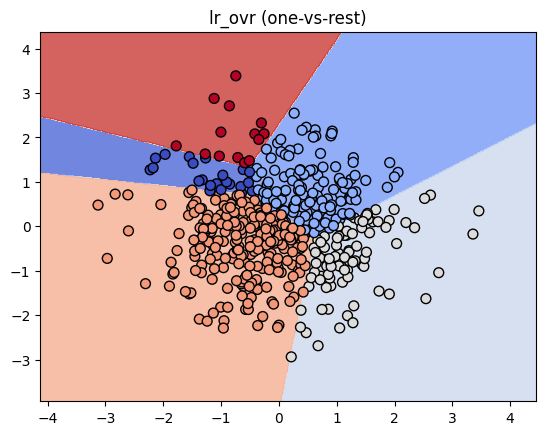

In [97]:
lr_ovr = LogisticRegression(max_iter=10000, C=100)
lr_ovr.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_ovr (one-vs-rest)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


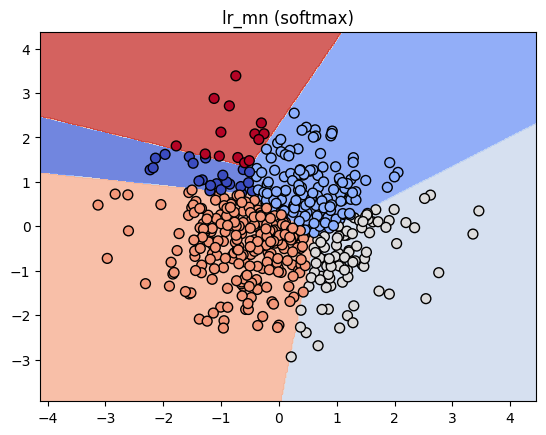

In [99]:
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)

fig, ax = plt.subplots();
ax.set_title("lr_mn (softmax)");
plot_classifier(X_train, y_train, lr_ovr, ax=ax);

Softmax training accuracy: 0.952
One-vs-rest training accuracy: 0.996


/tmp/ipython-input-3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipython-input-3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


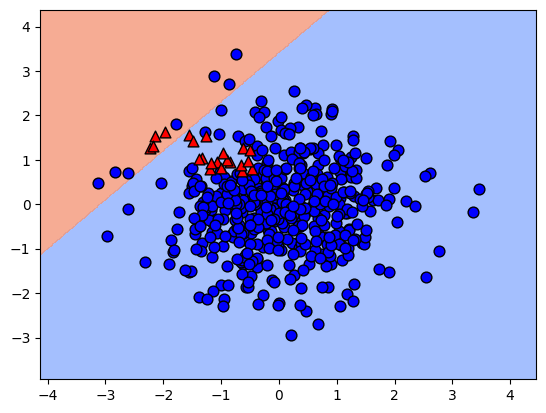

In [100]:
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(max_iter=10000, C=100)
lr_class_1.fit(X_train, y_train == 1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train == 1, lr_class_1);

As we can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. In general, though, one-vs-rest often works well.

We'll repeat the previous exercise with a non-linear SVM

In [101]:
X_test = pd.read_csv('/toy_X_test.csv').to_numpy()
y_test = pd.read_csv('/toy_y_test.csv').to_numpy().ravel()

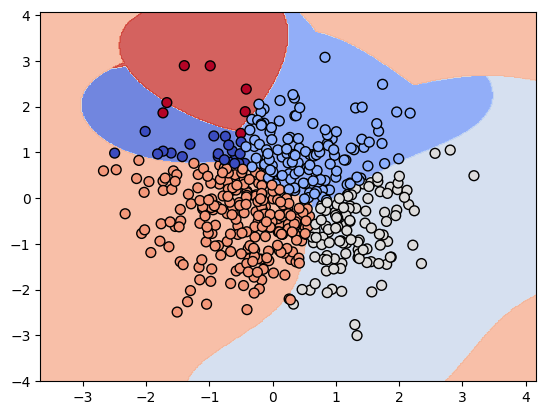

In [102]:
from sklearn.svm import SVC

# Create/plot the binary classifier
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train)
plot_classifier(X_test, y_test, svm_class_1)

/tmp/ipython-input-3513585600.py:68: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm,
/tmp/ipython-input-3513585600.py:70: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm,


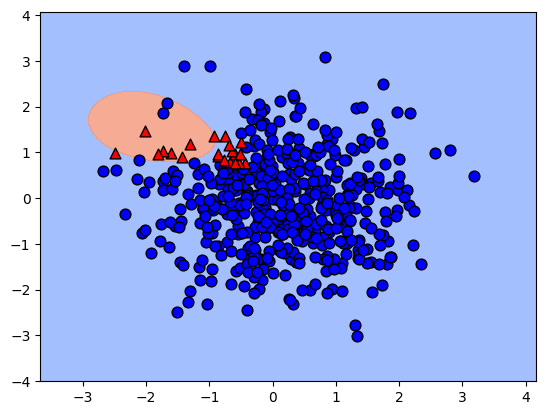

In [103]:
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train == 1)
plot_classifier(X_test, y_test == 1, svm_class_1)

The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.